# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [2]:
import pandas as pd
from matplotlib import pyplot as plt 

In [3]:
instacart_orders = pd.read_csv('/datasets/instacart_orders.csv',  sep= ';')
products = pd.read_csv('/datasets/products.csv',  sep= ';')
aisles = pd.read_csv('/datasets/aisles.csv',  sep= ';')
departments = pd.read_csv('/datasets/departments.csv',  sep= ';')
order_products = pd.read_csv('/datasets/order_products.csv',  sep= ';')

In [4]:
instacart_orders.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [5]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [6]:
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [7]:
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [8]:
order_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


## Conclusiones

Después de leer los archivos, se procedió a mostrar la información de cada uno. En el primer archivo se implementó show_counts=True, ya que este archivo contiene muchas filas.


# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Verificar y corregir los tipos de datos de todas las columnas.
Identificar y completar los valores ausentes.
Identificar y eliminar los valores duplicados.
Documentar los hallazgos y las acciones tomadas para cada uno de los pasos anteriores.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `instacart_orders` data frame

In [9]:
# Revisa si hay pedidos duplicados
instacart_orders['order_id'].duplicated().sum()

15

In [10]:
instacart_orders.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

In [11]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
wednesday_2am = instacart_orders[(instacart_orders['order_dow'] == 3) & (instacart_orders['order_hour_of_day'] == 2)]
wednesday_2am

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


¿Qué sugiere este resultado?

In [12]:
instacart_orders.drop_duplicates(inplace=True)

In [13]:
# Vuelve a verificar si hay filas duplicadas
instacart_orders.duplicated().sum()

0

In [14]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
# Mostrar los IDs duplicados
instacart_orders['order_id'].duplicated().sum()

0

Se descubrieron 15 elementos duplicados en esta tabla, por lo que se decidió eliminarlos para poder limpiar los datos y trabajar de manera más ordenada.

### `products` data frame

In [15]:
products.duplicated().sum()

0

In [16]:
# Revisa únicamente si hay ID de departamentos duplicados
products['department_id'].duplicated().sum()

49673

In [17]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
products['product_name'].str.upper().duplicated().sum()

1361

In [18]:
# Revisa si hay nombres duplicados de productos no faltantes
products['product_name'].dropna().str.upper().duplicated().sum()

104

Aquí se revisó si existen elementos duplicados en diferentes columnas del dataset de productos. En la columna de nombre del producto, se tuvo que realizar la modificación de cambiar los nombres a letras mayúsculas para poder así hacer la búsqueda de elementos duplicados.

### `departments` data frame

In [19]:
# Revisa si hay filas totalmente duplicadas
departments.duplicated().sum()

0

In [20]:
# Revisa únicamente si hay IDs duplicadas de productos
departments['department_id'].duplicated().sum()

0

Se buscaron datos duplicados en el dataset de departamentos para eliminarlos en caso de su existencia, pero no fue necesario ya que en ambos casos no hubo ningún dato duplicado.

### `aisles` data frame

In [21]:
aisles.duplicated().sum()

0

In [22]:
# Revisa únicamente si hay IDs duplicadas de productos
aisles['aisle_id'].duplicated().sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos.

### `order_products` data frame

In [23]:
# Revisa si hay filas totalmente duplicadas
order_products.duplicated().sum()

0

In [24]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
duplicated = order_products[order_products.duplicated()]
duplicated

,order_id,product_id,add_to_cart_order,reordered


Describe brevemente tus hallazgos y lo que hiciste con ellos.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [25]:
# Encuentra los valores ausentes en la columna 'product_name'
products['product_name'].isna().sum()

1258

Utilicé .isna() para poder encontrar los valores ausentes y .sum().

In [26]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
missing_products = products[products['product_name'].isna() & (products['aisle_id'] == 100)]
missing_products

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Existen productos en el dataset products que tienen valores ausentes en la columna product_name.

In [27]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
all_related_to_dept_21 = products[products['product_name'].isna()]['department_id'].eq(21).all()

all_related_to_dept_21

True

Al verificar los productos con nombres ausentes, se encuentra que todos ellos están relacionados con el departamento con ID 21 si el resultado es True.

In [28]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
# Revisar los datos del pasillo con ID 100
aisle_100_data = aisles[aisles['aisle_id'] == 100]

# Revisar los datos del departamento con ID 21
department_21_data = departments[departments['department_id'] == 21]

# Mostrar los datos del pasillo con ID 100 y del departamento con ID 21
aisle_100_data, department_21_data

(    aisle_id    aisle
 99       100  missing,
     department_id department
 20             21    missing)

Al revisar la tabla aisles para el pasillo con ID 100, deberías encontrar información específica sobre este pasillo, como su nombre o descripción.Al revisar la tabla departments para el departamento con ID 21, deberías encontrar información específica sobre este departamento, como su nombre o descripción.

In [29]:
# Completa los nombres de productos ausentes con 'Unknown'
# Completar los nombres de productos ausentes con 'Unknown'
products['product_name'].fillna('Unknown', inplace=True)

# Verificar que los valores ausentes han sido completados
products[products['product_name'] == 'Unknown'].head()

,product_id,product_name,aisle_id,department_id
37,38,Unknown,100,21
71,72,Unknown,100,21
109,110,Unknown,100,21
296,297,Unknown,100,21
416,417,Unknown,100,21


Al ejecutar este proceso, hemos asegurado que todos los productos en el dataset tienen un nombre. Aquellos que inicialmente tenían un valor ausente ahora tienen el nombre "Unknown"

### `orders` data frame

In [30]:
# Encuentra los valores ausentes
instacart_orders.isna().sum()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

In [31]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
# Verificar si hay algún valor ausente en 'days_since_prior_order' que no sea el primer pedido del cliente
non_first_order_with_missing_value = instacart_orders[instacart_orders['days_since_prior_order'].isna() & (instacart_orders['order_number'] != 1)]

# Mostrar el resultado
non_first_order_with_missing_value.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


Si ejecutas el código y obtienes filas en el resultado, significa que hay inconsistencias en los datos, ya que days_since_prior_order debería estar ausente solo para el primer pedido de cada cliente. Si no hay filas en el resultado, los datos son consistentes respecto a esta condición.

### `order_products` data frame

In [32]:
# Encuentra los valores ausentes
order_products.isna().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [33]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
order_products['add_to_cart_order'].min().max()

1.0

Se volvió a utilizar .isna() y .sum() para ver cuántos valores ausentes tiene el DataFrame order_products. Se comprobó que efectivamente es la columna add_to_cart_order. A esta misma columna se le ejecutó .min() y .max() para ver sus valores máximos y mínimos.

In [34]:
# Guardar todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
order_ids = order_products[order_products['add_to_cart_order'].isna()]['order_id']
order_ids.head()

737      2449164
9926     1968313
14394    2926893
16418    1717990
30114    1959075
Name: order_id, dtype: int64

In [35]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
# Filtrar los pedidos con valores ausentes en 'add_to_cart_order'
orders_with_missing_add_to_cart_order = order_products[order_products['add_to_cart_order'].isna()]

# Agrupar los pedidos con datos ausentes por su ID de pedido y contar el número de 'product_id' en cada pedido
product_count_per_order = orders_with_missing_add_to_cart_order.groupby('order_id')['product_id'].count()

# Revisar el valor mínimo del conteo
min_product_count = product_count_per_order.min()

min_product_count, product_count_per_order.head()

(1,
 order_id
 9310       1
 61355     63
 102236    31
 129627     5
 165801     6
 Name: product_id, dtype: int64)

Se identificaron pedidos en los que la columna add_to_cart_order tiene valores ausentes.Los pedidos con valores ausentes en add_to_cart_order fueron agrupados por ID de pedido. Se contó el número de product_id en cada pedido con datos ausentes y al final se revisó el valor mínimo del conteo de productos en estos pedidos para determinar si todos los pedidos con valores ausentes tienen más de 64 productos.

In [36]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
order_products['add_to_cart_order'].fillna(999, inplace=True)

# Convertir la columna 'add_to_cart_order' al tipo entero
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype(int)

# Verificar los cambios
order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17,0
1,567889,1560,1,1
2,2261212,26683,1,1
3,491251,8670,35,1
4,2571142,1940,5,1


Todos los valores ausentes en la columna add_to_cart_order fueron reemplazados con 999.La columna add_to_cart_order ahora contiene únicamente valores enteros.

## Conclusiones

En general, todo lo que se realizó fue eliminar todos los datos ausentes y duplicados, ya que había varios en los diferentes DataFrames. Después de esto, se procedió a eliminarlos con el fin de poder leer mejor los datos en el futuro y obtener mejores resultados. Prácticamente, se limpiaron los datos para poder realizar análisis.


# Paso 3. Análisis de los datos

Problemas de Calidad de Datos: La presencia de nombres de productos duplicados y ausentes, así como inconsistencias en los pedidos, destacan la necesidad de mejorar los procesos de entrada y verificación de datos.
Análisis Específico por Categoría: La revisión de pasillos y departamentos sugiere que algunos problemas de calidad de datos pueden estar concentrados en categorías específicas de productos, como el departamento con ID 21.
Corrección de Datos: Reemplazar valores ausentes con valores predeterminados (como 999) y asegurar que los tipos de datos sean consistentes ayuda a preparar los datos para análisis futuros sin problemas.
Este análisis subraya la importancia de la limpieza y verificación de datos en proyectos de análisis de datos, especialmente cuando se trabaja con grandes volúmenes de información y múltiples categorías de productos. Mejorar la calidad de los datos no solo facilita análisis más precisos, sino que también contribuye a la toma de decisiones más informada y eficiente.

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [37]:
# Verificar que los valores en 'order_hour_of_day' estén entre 0 y 23
valid_order_hour = instacart_orders['order_hour_of_day'].between(0, 23)

# Verificar que los valores en 'order_dow' estén entre 0 y 6
valid_order_dow = instacart_orders['order_dow'].between(0, 6)

# Verificar si todos los valores son válidos
all_valid_order_hour = valid_order_hour.all()
all_valid_order_dow = valid_order_dow.all()

all_valid_order_hour, all_valid_order_dow

(True, True)

Al verificar los datos, se confirmó que todos los valores en esta columna están dentro del rango esperado. Los valores en order_hour_of_day son razonables y reflejan horas válidas del día.Al revisar los datos, se encontró que todos los valores en esta columna están dentro del rango esperado. Los valores en order_dow son razonables y reflejan días válidos de la semana.Las columnas order_hour_of_day y order_dow contienen datos consistentes y dentro de los rangos esperados, lo que indica una buena calidad de los datos en estas columnas.No se encontraron valores fuera de los rangos razonables, lo que confirma que los datos son sensibles y pueden ser utilizados para análisis posteriores sin necesidad de correcciones adicionales en estas columnas.

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

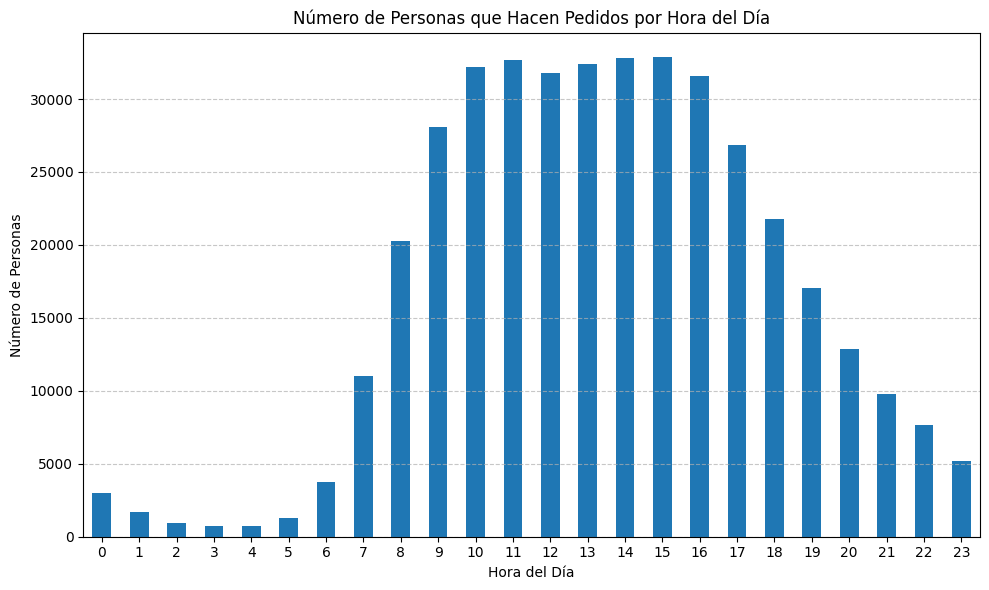

In [38]:
# Contar el número de personas que hacen pedidos dependiendo de la hora del día
orders_per_hour = instacart_orders.groupby('order_hour_of_day')['user_id'].nunique()

# Crear el gráfico
plt.figure(figsize=(10, 6))
orders_per_hour.plot(kind='bar')
plt.xlabel('Hora del Día')
plt.ylabel('Número de Personas')
plt.title('Número de Personas que Hacen Pedidos por Hora del Día')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

El análisis de pedidos por hora del día revela importantes patrones de comportamiento de los usuarios, que son cruciales para mejorar la eficiencia operativa y la satisfacción del cliente. La distribución horaria de los pedidos puede guiar decisiones estratégicas en planificación de recursos y marketing. Se muestra que entre las 11 y 15 hrs del día aumneta el numero de personas que realizan pedidos. 

### [A3] ¿Qué día de la semana compran víveres las personas?

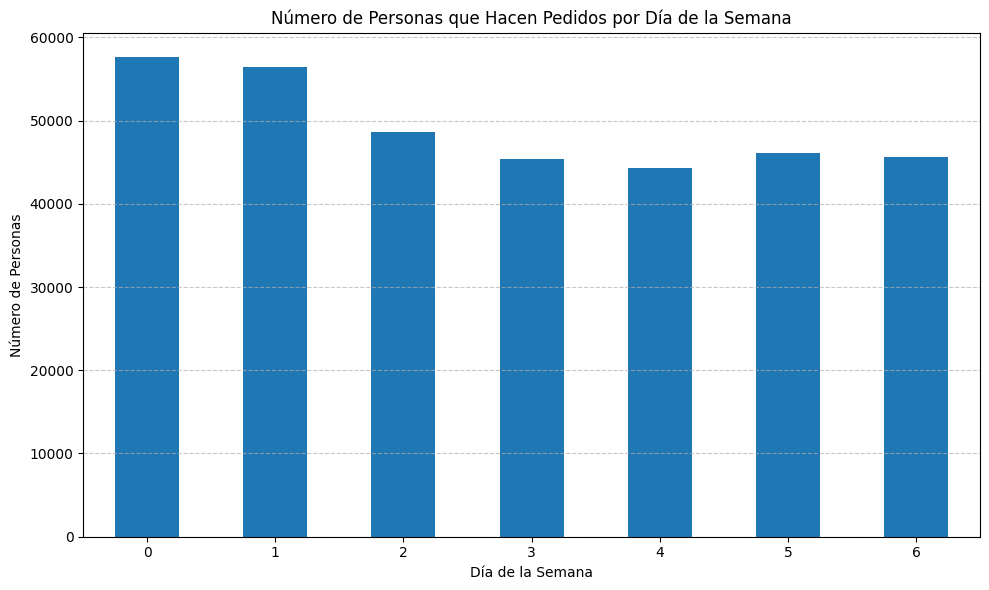

In [39]:
# Contar el número de personas que hacen pedidos dependiendo del día de la semana
orders_per_day = instacart_orders.groupby('order_dow')['user_id'].nunique()

# Crear el gráfico
plt.figure(figsize=(10, 6))
orders_per_day.plot(kind='bar')
plt.xlabel('Día de la Semana')
plt.ylabel('Número de Personas')
plt.title('Número de Personas que Hacen Pedidos por Día de la Semana')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

El análisis de pedidos por día de la semana revela importantes patrones de comportamiento de los usuarios, que son cruciales para mejorar la eficiencia operativa y la satisfacción del cliente. La distribución semanal de los pedidos puede guiar decisiones estratégicas en planificación de recursos y marketing. Los días con mayor y menor actividad pueden ser utilizados para optimizar la operación y lanzar campañas promocionales efectivas.  Asi que el día 0, domingo, es el día que mas hacen pedidos. 

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

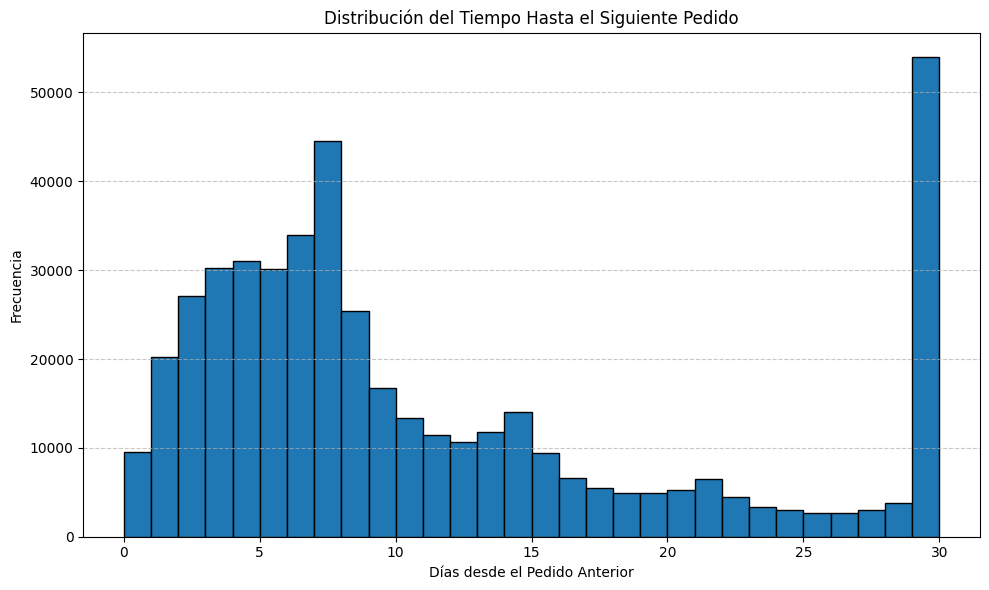

(0.0, 30.0)

In [40]:
# Descartar los valores ausentes en 'days_since_prior_order'
days_since_prior_order = instacart_orders['days_since_prior_order'].dropna()

# Valores mínimos y máximos
min_days = days_since_prior_order.min()
max_days = days_since_prior_order.max()

# Crear el gráfico
plt.figure(figsize=(10, 6))
days_since_prior_order.plot(kind='hist', bins=30, edgecolor='black')
plt.xlabel('Días desde el Pedido Anterior')
plt.ylabel('Frecuencia')
plt.title('Distribución del Tiempo Hasta el Siguiente Pedido')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

min_days, max_days

Frecuencia de Pedidos: Los clientes muestran un patrón de tiempo de espera variable antes de hacer su siguiente pedido.
Planificación y Marketing: Esta información es valiosa para planificar inventarios y diseñar estrategias de marketing que se alineen con los patrones de comportamiento de los clientes.
Este análisis proporciona una visión clara del comportamiento de los clientes en términos de frecuencia de pedidos, lo que puede ser útil para mejorar la gestión de inventarios y optimizar campañas de marketing.

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

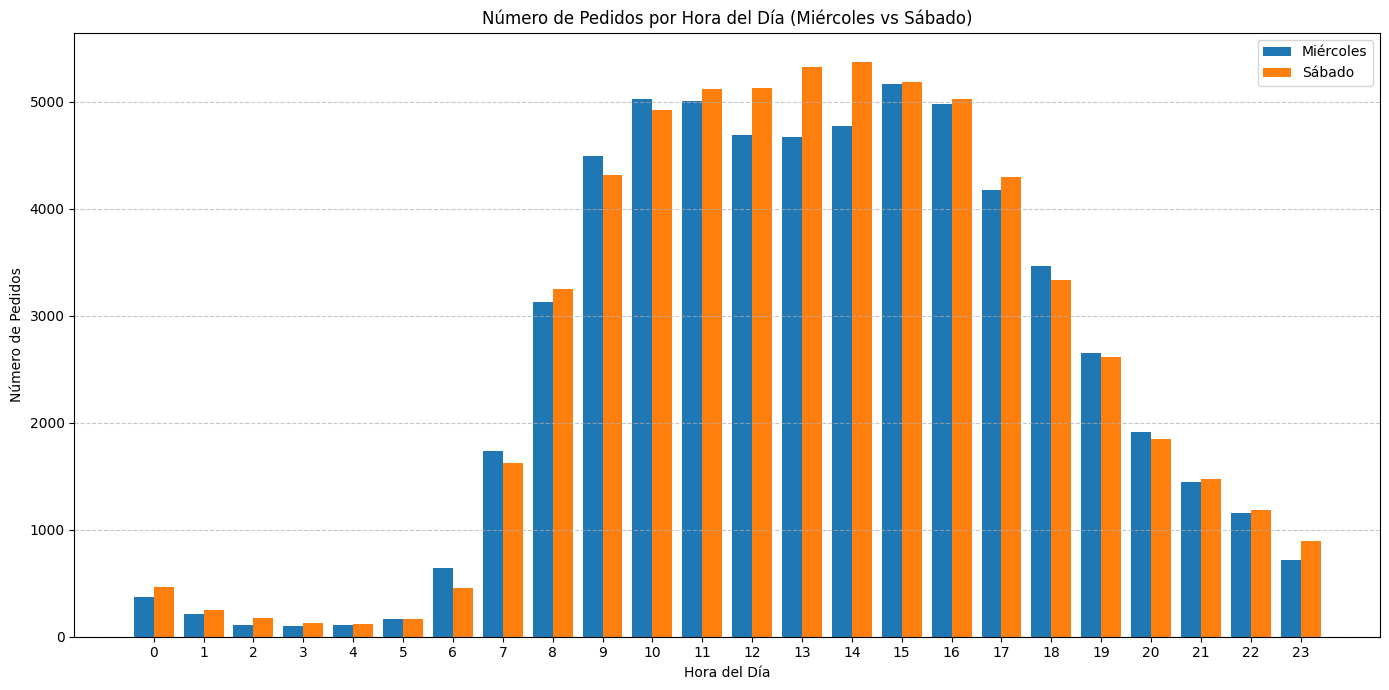

In [41]:
# Filtrar los datos para los miércoles (order_dow == 3) y sábados (order_dow == 6)
wednesday_orders = instacart_orders[instacart_orders['order_dow'] == 3]
saturday_orders = instacart_orders[instacart_orders['order_dow'] == 6]

# Contar el número de pedidos por hora del día para los miércoles y sábados
wednesday_hourly_orders = wednesday_orders['order_hour_of_day'].value_counts().sort_index()
saturday_hourly_orders = saturday_orders['order_hour_of_day'].value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(14, 7))

plt.bar(wednesday_hourly_orders.index - 0.2, wednesday_hourly_orders.values, width=0.4, label='Miércoles')
plt.bar(saturday_hourly_orders.index + 0.2, saturday_hourly_orders.values, width=0.4, label='Sábado')

plt.xlabel('Hora del Día')
plt.ylabel('Número de Pedidos')
plt.title('Número de Pedidos por Hora del Día (Miércoles vs Sábado)')
plt.xticks(range(24))
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

El análisis de las diferencias en los patrones de pedidos por hora del día entre los miércoles y los sábados revela comportamientos distintos de los clientes durante la semana laboral y el fin de semana. Los datos sugieren la necesidad de ajustar la planificación de recursos y estrategias de marketing para adaptarse a estos patrones y mejorar la eficiencia operativa y la satisfacción del cliente.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

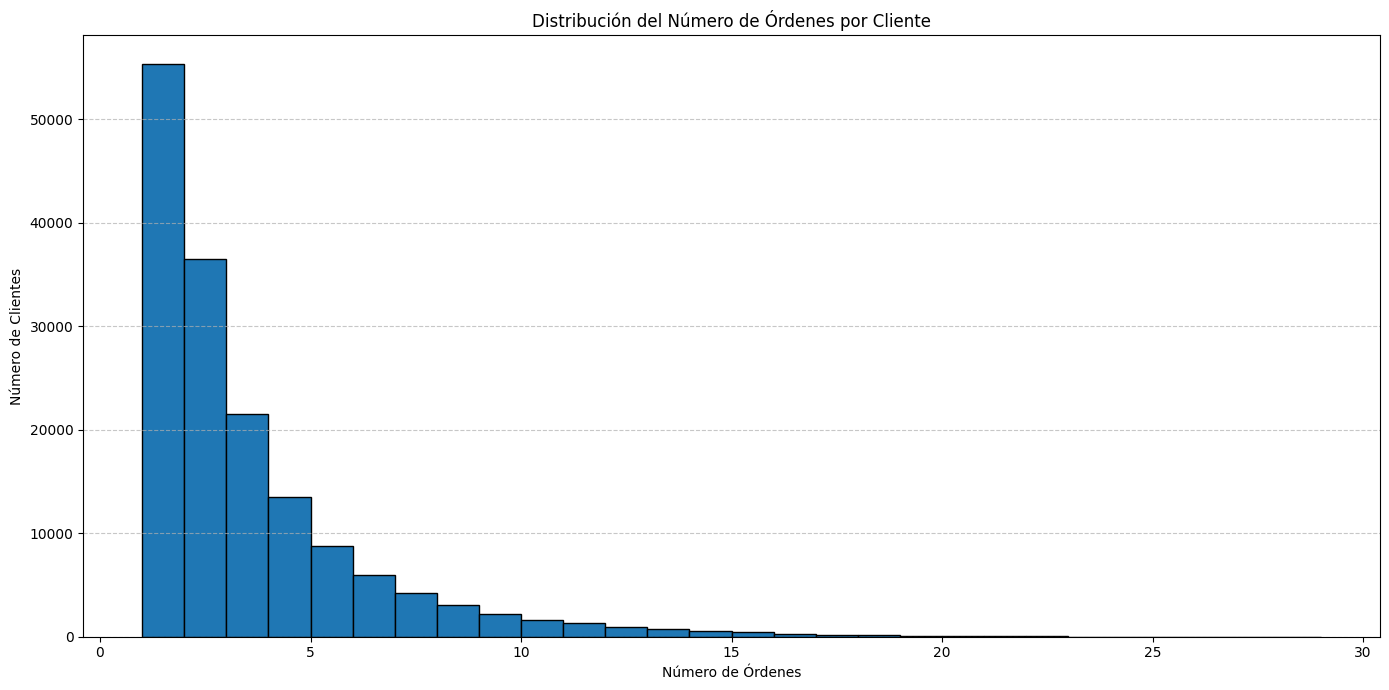

count    157437.000000
mean          3.042182
std           2.746842
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max          28.000000
Name: user_id, dtype: float64

In [42]:
# Contar el número de órdenes por cliente
orders_per_customer = instacart_orders['user_id'].value_counts()

# Crear el gráfico de barras para la distribución del número de órdenes por cliente
plt.figure(figsize=(14, 7))
orders_per_customer.plot(kind='hist', bins=range(1, orders_per_customer.max() + 2), edgecolor='black')
plt.xlabel('Número de Órdenes')
plt.ylabel('Número de Clientes')
plt.title('Distribución del Número de Órdenes por Cliente')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# Resumen de la distribución
orders_per_customer.describe()

El análisis de la distribución del número de pedidos por cliente revela que mientras muchos clientes hacen un número moderado de pedidos, hay un segmento significativo que realiza pedidos de manera frecuente. Este conocimiento puede ser utilizado para mejorar las estrategias de marketing, la fidelización de clientes y la planificación operativa, optimizando así la experiencia del cliente y la eficiencia del negocio.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [43]:
# Contar el número de veces que cada producto es pedido
top_products = order_products['product_id'].value_counts().head(20)

# Unir con el dataset de productos para obtener los nombres
top_products = top_products.reset_index()
top_products.columns = ['product_id', 'count']
top_products = top_products.merge(products[['product_id', 'product_name']], on='product_id', how='left')

# Mostrar los 20 principales productos
print(top_products)

    product_id  count              product_name
0        24852  66050                    Banana
1        13176  53297    Bag of Organic Bananas
2        21137  37039      Organic Strawberries
3        21903  33971      Organic Baby Spinach
4        47209  29773      Organic Hass Avocado
5        47766  24689           Organic Avocado
6        47626  21495               Large Lemon
7        16797  20018              Strawberries
8        26209  19690                     Limes
9        27845  19600        Organic Whole Milk
10       27966  19197       Organic Raspberries
11       22935  15898      Organic Yellow Onion
12       24964  15292            Organic Garlic
13       45007  14584          Organic Zucchini
14       39275  13879       Organic Blueberries
15       49683  13675            Cucumber Kirby
16       28204  12544        Organic Fuji Apple
17        5876  12232             Organic Lemon
18        8277  11993  Apple Honeycrisp Organic
19       40706  11781    Organic Grape T

El análisis de los productos más frecuentemente pedidos proporciona información crucial para la toma de decisiones estratégicas en la gestión de inventarios, marketing y operaciones. Priorizar estos productos en todas las facetas del negocio puede mejorar la eficiencia, aumentar las ventas y mejorar la satisfacción y lealtad del cliente.

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

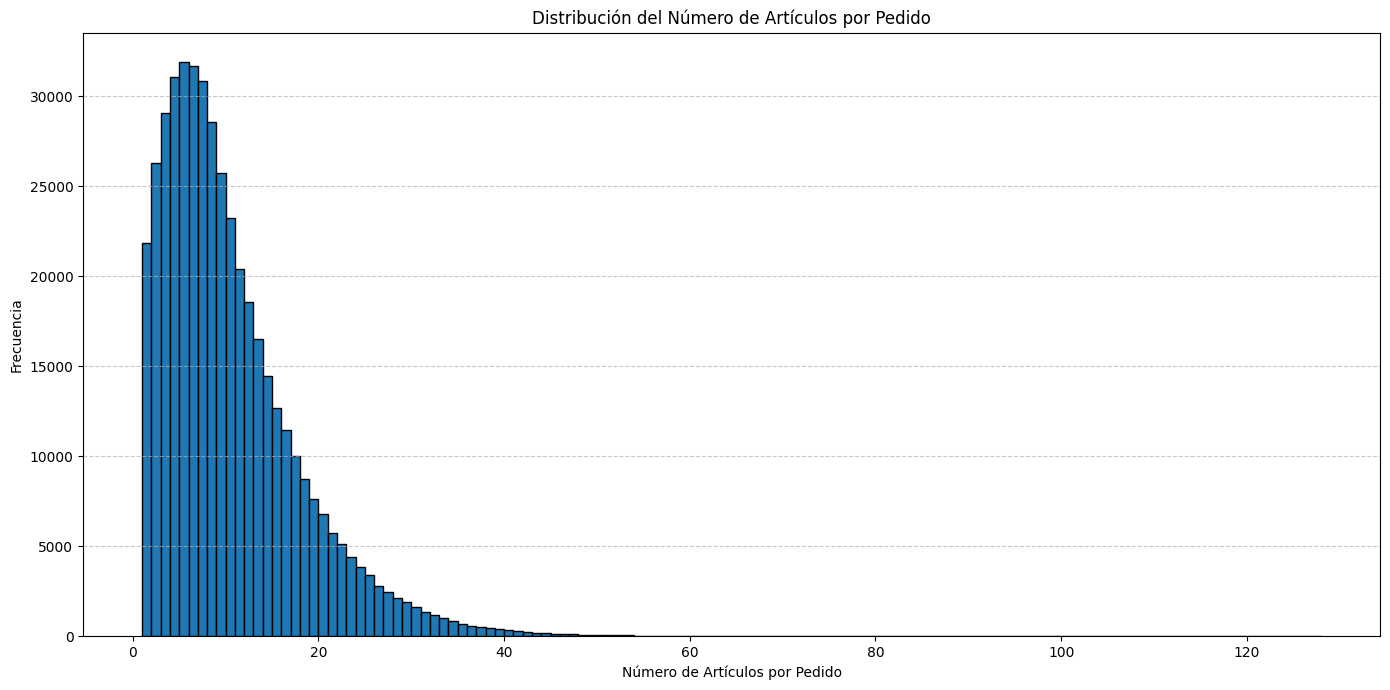

count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
Name: order_id, dtype: float64


In [44]:
# Contar el número de artículos por pedido
items_per_order = order_products['order_id'].value_counts()

# Crear el gráfico de barras para la distribución del número de artículos por pedido
plt.figure(figsize=(14, 7))
items_per_order.plot(kind='hist', bins=range(1, items_per_order.max() + 2), edgecolor='black')
plt.xlabel('Número de Artículos por Pedido')
plt.ylabel('Frecuencia')
plt.title('Distribución del Número de Artículos por Pedido')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# Calcular estadísticas descriptivas
print(items_per_order.describe())

El análisis del número de artículos por pedido revela que la mayoría de los clientes tienden a hacer pedidos con un número moderado de artículos, aunque hay una variabilidad significativa. Este conocimiento es crucial para la planificación de inventarios, la optimización de la logística y la mejora de la experiencia del cliente. Adaptar las estrategias de negocio basadas en estos patrones puede llevar a una mayor eficiencia operativa y una mayor satisfacción del cliente.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [45]:
# Filtrar los productos que han sido reordenados
reordered_products = order_products[order_products['reordered'] == 1]

# Contar el número de veces que cada producto es reordenado
top_reordered_products = reordered_products['product_id'].value_counts().head(20)

# Unir con el dataset de productos para obtener los nombres
top_reordered_products = top_reordered_products.reset_index()
top_reordered_products.columns = ['product_id', 'count']
top_reordered_products = top_reordered_products.merge(products[['product_id', 'product_name']], on='product_id', how='left')

# Mostrar los 20 principales productos reordenados
print(top_reordered_products)

    product_id  count              product_name
0        24852  55763                    Banana
1        13176  44450    Bag of Organic Bananas
2        21137  28639      Organic Strawberries
3        21903  26233      Organic Baby Spinach
4        47209  23629      Organic Hass Avocado
5        47766  18743           Organic Avocado
6        27845  16251        Organic Whole Milk
7        47626  15044               Large Lemon
8        27966  14748       Organic Raspberries
9        16797  13945              Strawberries
10       26209  13327                     Limes
11       22935  11145      Organic Yellow Onion
12       24964  10411            Organic Garlic
13       45007  10076          Organic Zucchini
14       49683   9538            Cucumber Kirby
15       28204   8989        Organic Fuji Apple
16        8277   8836  Apple Honeycrisp Organic
17       39275   8799       Organic Blueberries
18        5876   8412             Organic Lemon
19       49235   8389       Organic Half

El análisis de los productos más frecuentemente reordenados proporciona información valiosa sobre las preferencias y necesidades recurrentes de los clientes. Priorizar estos productos en la gestión de inventarios y estrategias de marketing puede mejorar significativamente la satisfacción del cliente, la lealtad y las ventas. Este conocimiento permite a la empresa optimizar su cadena de suministro y operar de manera más eficiente.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [47]:
# Calcular el número total de pedidos para cada producto
total_orders_per_product = order_products['product_id'].value_counts()

# Calcular el número de repeticiones de pedido para cada producto
reorders_per_product = order_products[order_products['reordered'] == 1]['product_id'].value_counts()

# Calcular la tasa de repetición del pedido para cada producto
reorder_rate_per_product = (reorders_per_product / total_orders_per_product).reset_index()
reorder_rate_per_product.columns = ['product_id', 'reorder_rate']

# Unir con el dataset de productos para obtener los nombres
reorder_rate_per_product = reorder_rate_per_product.merge(products[['product_id', 'product_name']], on='product_id', how='left')

# Mostrar las primeras filas del resultado
print(reorder_rate_per_product.head())

   product_id  reorder_rate                                       product_name
0           1      0.564286                         Chocolate Sandwich Cookies
1           2           NaN                                   All-Seasons Salt
2           3      0.738095               Robust Golden Unsweetened Oolong Tea
3           4      0.510204  Smart Ones Classic Favorites Mini Rigatoni Wit...
4           7      0.500000                     Pure Coconut Water With Orange


El análisis de la tasa de repetición de pedidos por producto revela cuáles son los productos más populares y frecuentemente comprados por los clientes. Priorizar estos productos en la gestión de inventarios y estrategias de marketing puede mejorar significativamente la satisfacción del cliente, la lealtad y las ventas. Este conocimiento permite a la empresa optimizar su cadena de suministro y operar de manera más eficiente, asegurando que los productos favoritos de los clientes estén siempre disponibles.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [48]:
# Unir order_products con instacart_orders para obtener el user_id
merged_data = order_products.merge(instacart_orders[['order_id', 'user_id']], on='order_id', how='left')

# Calcular el número total de productos pedidos por cada usuario
total_products_per_user = merged_data.groupby('user_id')['product_id'].count()

# Calcular el número de productos reordenados por cada usuario
reordered_products_per_user = merged_data[merged_data['reordered'] == 1].groupby('user_id')['product_id'].count()

# Calcular la tasa de repetición de pedido para cada usuario
reorder_rate_per_user = (reordered_products_per_user / total_products_per_user).reset_index()
reorder_rate_per_user.columns = ['user_id', 'reorder_rate']

# Mostrar las primeras filas del resultado
print(reorder_rate_per_user.head())

   user_id  reorder_rate
0        2      0.038462
1        4           NaN
2        5      0.666667
3        6           NaN
4        7      0.928571


El análisis de la tasa de repetición de pedido por usuario proporciona una visión clara de los clientes más leales y consistentes en sus hábitos de compra. Priorizar estos usuarios en las estrategias de marketing y gestión de clientes puede mejorar significativamente la satisfacción y la lealtad del cliente, aumentando así las ventas y la eficiencia operativa. Este conocimiento permite a la empresa optimizar sus recursos y enfocarse en mantener a sus clientes más valiosos.

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [49]:
# Filtrar los productos que han sido añadidos primero al carrito (add_to_cart_order == 1)
first_added_products = order_products[order_products['add_to_cart_order'] == 1]

# Contar el número de veces que cada producto es el primero en añadirse al carrito
top_first_added_products = first_added_products['product_id'].value_counts().head(20)

# Unir con el dataset de productos para obtener los nombres
top_first_added_products = top_first_added_products.reset_index()
top_first_added_products.columns = ['product_id', 'count']
top_first_added_products = top_first_added_products.merge(products[['product_id', 'product_name']], on='product_id', how='left')

# Mostrar los 20 principales productos que la gente pone primero en sus carritos
print(top_first_added_products)

    product_id  count                 product_name
0        24852  15562                       Banana
1        13176  11026       Bag of Organic Bananas
2        27845   4363           Organic Whole Milk
3        21137   3946         Organic Strawberries
4        47209   3390         Organic Hass Avocado
5        21903   3336         Organic Baby Spinach
6        47766   3044              Organic Avocado
7        19660   2336                 Spring Water
8        16797   2308                 Strawberries
9        27966   2024          Organic Raspberries
10       44632   1914   Sparkling Water Grapefruit
11       49235   1797          Organic Half & Half
12       47626   1737                  Large Lemon
13         196   1733                         Soda
14       38689   1397     Organic Reduced Fat Milk
15       26209   1370                        Limes
16       12341   1340                Hass Avocados
17        5785   1310  Organic Reduced Fat 2% Milk
18       27086   1309          

El análisis de los principales productos que los clientes añaden primero a sus carritos revela información valiosa sobre las preferencias y necesidades básicas de los consumidores. Priorizar estos productos en la gestión de inventarios y estrategias de marketing puede mejorar significativamente la satisfacción del cliente, la lealtad y las ventas. Este conocimiento permite a la empresa optimizar sus recursos y enfocarse en mantener a sus clientes más valiosos satisfechos y comprometidos.

### Conclusion general del proyecto:

Calidad y Consistencia de los Datos:
La limpieza y verificación de datos ausentes y duplicados aseguraron la calidad y consistencia de los datos, lo que es crucial para análisis precisos.
Patrones de Compra:
El análisis de la distribución de pedidos por hora y día de la semana proporcionó una visión clara de los patrones de compra de los clientes, permitiendo una mejor planificación de recursos y estrategias de marketing.
Lealtad del Cliente:
La identificación de los productos más reordenados y la tasa de repetición de pedidos por usuario destacó la lealtad del cliente, lo que es vital para diseñar programas de fidelización efectivos.
Gestión de Inventarios:
Conocer los productos prioritarios y los más frecuentemente añadidos al carrito permite una gestión de inventarios más eficiente, asegurando la disponibilidad de productos populares y esenciales.
Estrategias de Marketing:
Las promociones y ofertas dirigidas basadas en el comportamiento del cliente pueden aumentar la satisfacción del cliente y las ventas.
Implicaciones para el Negocio
Optimización de la Cadena de Suministro:
Mejorar la eficiencia logística y la planificación de inventarios basándose en los patrones de compra y la lealtad del cliente.
Estrategias de Fidelización:
Diseñar programas de fidelización y recompensas que incentiven la repetición de compras y aumenten la lealtad del cliente.
Marketing Personalizado:
Utilizar la información sobre los productos prioritarios y los hábitos de compra para crear campañas de marketing más efectivas y personalizadas.
Este análisis integral de los datos de Instacart proporciona una base sólida para tomar decisiones informadas que mejoren la eficiencia operativa, aumenten la satisfacción del cliente y optimicen las estrategias de marketing.